# EDA of Spotify top 10,000 Dataset

## Importing dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Spotify_final_dataset 2.csv to Spotify_final_dataset 2.csv


In [4]:
import io
spotify = pd.read_csv(io.BytesIO(uploaded['Spotify_final_dataset 2.csv']))
# Dataset is now stored in a Pandas Dataframe
spotify

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961
...,...,...,...,...,...,...,...,...,...
11079,11080,The Band Perry,If I Die Young,1,0.0,184,0,51321,51321
11080,11081,Justin Timberlake,Not a Bad Thing,1,0.0,196,0,49512,49512
11081,11082,Mike WiLL Made,It 23,1,0.0,167,0,46547,46547
11082,11083,The Vamps,Somebody To You,1,0.0,200,0,44962,44962


## Checking and cleaning Dataset

In [5]:
spotify.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961


Need to remove '(', 'x' and ')' from peak position (xTimes) column

In [6]:
spotify['Peak Position (xTimes)']

0         (x29)
1         (x20)
2          (x4)
3             0
4        (x124)
          ...  
11079         0
11080         0
11081         0
11082         0
11083         0
Name: Peak Position (xTimes), Length: 11084, dtype: object

In [7]:
spotify['Peak Position (xTimes)'] = spotify['Peak Position (xTimes)'].str.strip('(').str.strip(')').str.strip('x')
spotify['Peak Position (xTimes)']

0         29
1         20
2          4
3          0
4        124
        ... 
11079      0
11080      0
11081      0
11082      0
11083      0
Name: Peak Position (xTimes), Length: 11084, dtype: object

In [8]:
# Checking if this change was permanent
spotify.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,4,1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,124,2905678,718865961


In [9]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position                11084 non-null  int64  
 1   Artist Name             11084 non-null  object 
 2   Song Name               11080 non-null  object 
 3   Days                    11084 non-null  int64  
 4   Top 10 (xTimes)         11084 non-null  float64
 5   Peak Position           11084 non-null  int64  
 6   Peak Position (xTimes)  11084 non-null  object 
 7   Peak Streams            11084 non-null  int64  
 8   Total Streams           11084 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 779.5+ KB


Need to change the data type of Peak position (x times) from object to Integer

In [10]:
spotify['Peak Position (xTimes)']= spotify['Peak Position (xTimes)'].astype(str).astype(int)
# Converting to string first and then Integer. 
#Make sure to assign it to do "spotify['Peak Position (xTimes)'] =" Or it will not be a permanent change

In [11]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position                11084 non-null  int64  
 1   Artist Name             11084 non-null  object 
 2   Song Name               11080 non-null  object 
 3   Days                    11084 non-null  int64  
 4   Top 10 (xTimes)         11084 non-null  float64
 5   Peak Position           11084 non-null  int64  
 6   Peak Position (xTimes)  11084 non-null  int64  
 7   Peak Streams            11084 non-null  int64  
 8   Total Streams           11084 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 779.5+ KB


Song name only has 4 null values, so should not affect the EDA

## First Observations

In [12]:
spotify.describe(include = 'object')

,Artist Name,Song Name
count,11084,11080
unique,1612,9992
top,Drake,Intro
freq,208,12


Observations:

There are 1612 different artists in this data frame and 11080 different songs (named). Drake's Songs appear the most in the dataframe (208 times) and the song 'Intro' appears 12 times in the dataframe.

In [13]:
spotify.describe()

,Position,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
count,11084.000000,11084.000000,11084.000000,11084.000000,11084.000000,1.108400e+04,1.108400e+04
mean,5542.500000,53.366925,2.713641,83.070101,0.386954,5.529469e+05,1.830891e+07
std,3199.819526,129.750902,15.604130,58.932049,3.604104,6.282936e+05,5.219383e+07
min,1.000000,1.000000,0.000000,1.000000,0.000000,4.432300e+04,4.432300e+04
25%,2771.750000,2.000000,0.000000,29.000000,0.000000,2.431595e+05,3.824272e+05
50%,5542.500000,7.000000,0.000000,75.000000,0.000000,3.505885e+05,1.704876e+06
75%,8313.250000,39.000000,0.000000,132.000000,0.000000,5.963382e+05,1.078333e+07
max,11084.000000,2547.000000,302.000000,200.000000,124.000000,7.786096e+06,8.833697e+08


Observations:

The average number of days from the song release, to the creation of the dataset is 53. 

Average number of times a song has been in the top 10 is 2 times and the maximum time is 302 times *May want to find out which song this is*

In [14]:
spotify['Artist Name'].value_counts()
#To see top 5 artists (based on number of songs in top 10,000) and bottom 5 artists

Drake              208
Future             190
Taylor Swift       172
Logic              120
Trippie Redd       114
                  ... 
HRVY                 1
Lean Trap            1
Travie McCoy         1
Nate Ruess           1
The Band Perry       1
Name: Artist Name, Length: 1612, dtype: int64

In [15]:
spotify['Song Name'].value_counts()

Intro                12
Forever               9
Higher                7
Sorry                 6
White Christmas       6
                     ..
Solitaire             1
Beggin For Thread     1
Who Shot Cupid?       1
American Kids         1
Z  Holy Grail         1
Name: Song Name, Length: 9992, dtype: int64

In [16]:
# Would want to see if Intro is by the same artist or is different artists but the same name
spotify.loc[spotify['Song Name'] == 'Intro']

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
2954,2955,J. Cole,Intro,28,1.0,10,0,2519357,9436962
3815,3816,Drake,Intro,6,1.0,5,0,2633372,4975568
4100,4101,Khalid,Intro,10,0.0,28,0,862663,3997931
4606,4607,Meek Mill,Intro,7,0.0,47,0,632525,2796945
5171,5172,21 Savage,Intro,4,0.0,14,0,1076774,2072620
6222,6223,Big Sean,Intro,5,0.0,56,0,397662,1197602
6571,6572,Quality Control,Intro,4,0.0,125,0,273523,995782
8388,8389,Shawn Mendes,Intro,1,0.0,93,0,362253,362253
8431,8432,Ski Mask The Slump God,Intro,1,0.0,102,0,353747,353747
8601,8602,Roddy Ricch,Intro,1,0.0,140,0,328882,328882


Observation: Intro are different song names. However, seems to be the most popular choice for somg names in this dataset.

In [17]:
# Grouping Artists to see number of times their songs have been in top 10
spotify.groupby('Artist Name')[['Top 10 (xTimes)']].sum().sort_values('Top 10 (xTimes)', ascending=False).head(10)

,Top 10 (xTimes)
Artist Name,
Drake,2364.0
Post Malone,1706.0
The Weeknd,1157.0
Ariana Grande,769.0
Justin Bieber,675.0
Lil Nas X,641.0
Juice WRLD,618.0
Taylor Swift,615.0
Olivia Rodrigo,556.0


In [18]:
spotify.groupby('Artist Name')[['Total Streams']].sum().sort_values('Total Streams', ascending=False).head(10)
#Looking at top 10 artists based on Total streams

,Total Streams
Artist Name,
Drake,9228928893
Post Malone,7400199432
Juice WRLD,4857996474
The Weeknd,4267010379
XXXTENTACION,3689771047
Taylor Swift,3222972346
Ariana Grande,3168771349
Billie Eilish,3119498389
Lil Uzi Vert,2915127161


Observation: Slight difference in the top 2 graphs. Drake, Post Malone and The Weeknd are in the top 5 (based on total streams and number of times their songs ranked in the top 10) but Juice WRLD, XXXTENTACION, Ariana Grande and Justin Bieber differ

In [19]:
from numpy.core.fromnumeric import mean
spotify.groupby('Artist Name')[['Peak Position']].agg([mean, min, max])

Peak Position          
                           mean  min  max
Artist Name                              
$NOT                  49.000000   31   67
$ilkMoney            142.000000  142  142
$uicideboy$          100.285714   35  196
*NSYNC               109.666667   30  155
100 gecs             182.000000  182  182
...                         ...  ...  ...
quinnie              164.000000  164  164
salem ilese           51.000000   51   51
siouxxie sixxsta      75.000000   75   75
townhall              65.000000   35   95
Ñengo Flow            19.000000   19   19

[1612 rows x 3 columns]

## Data Visualisation and insights

In [20]:
%matplotlib inline
# So i can see the visuals as I create them

In [21]:
spotify.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,4,1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,124,2905678,718865961


<Axes: >

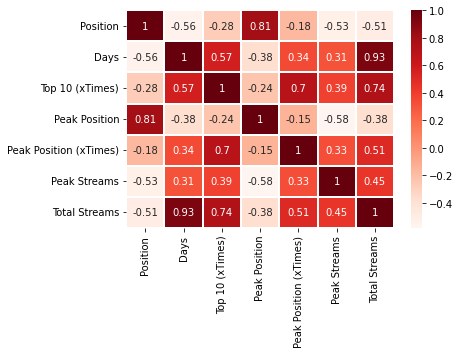

In [22]:
sns.heatmap(spotify.corr(),linewidths=2,cmap="Reds", annot=True)

above 0.5 show *positive correlation.*

Days with: top 10 (x times), total streams (very strong correlation)

Top 10 (x times) with: peak position (x times), Total Streams

Peak position with: Position

Below -0.5 shows *negative correlation.*

Position with: Days, peak streams and total streams

peak position with: Peak streams

<Axes: xlabel='Days', ylabel='Total Streams'>

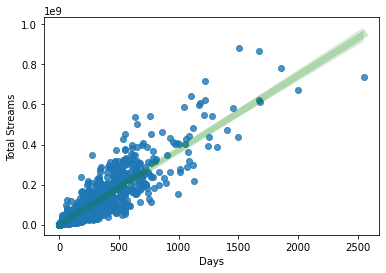

In [23]:
sns.regplot(x='Days', y='Total Streams', data=spotify, line_kws={"color":"green","alpha":0.2,"lw":7}) 

strong positive correlation between number of days a song is released, and the total streaming number. the longer it has been since the song was released, thr more likely it is to have a higher streaming number, and therefore, to be ranked in a higher position on the top 10,000

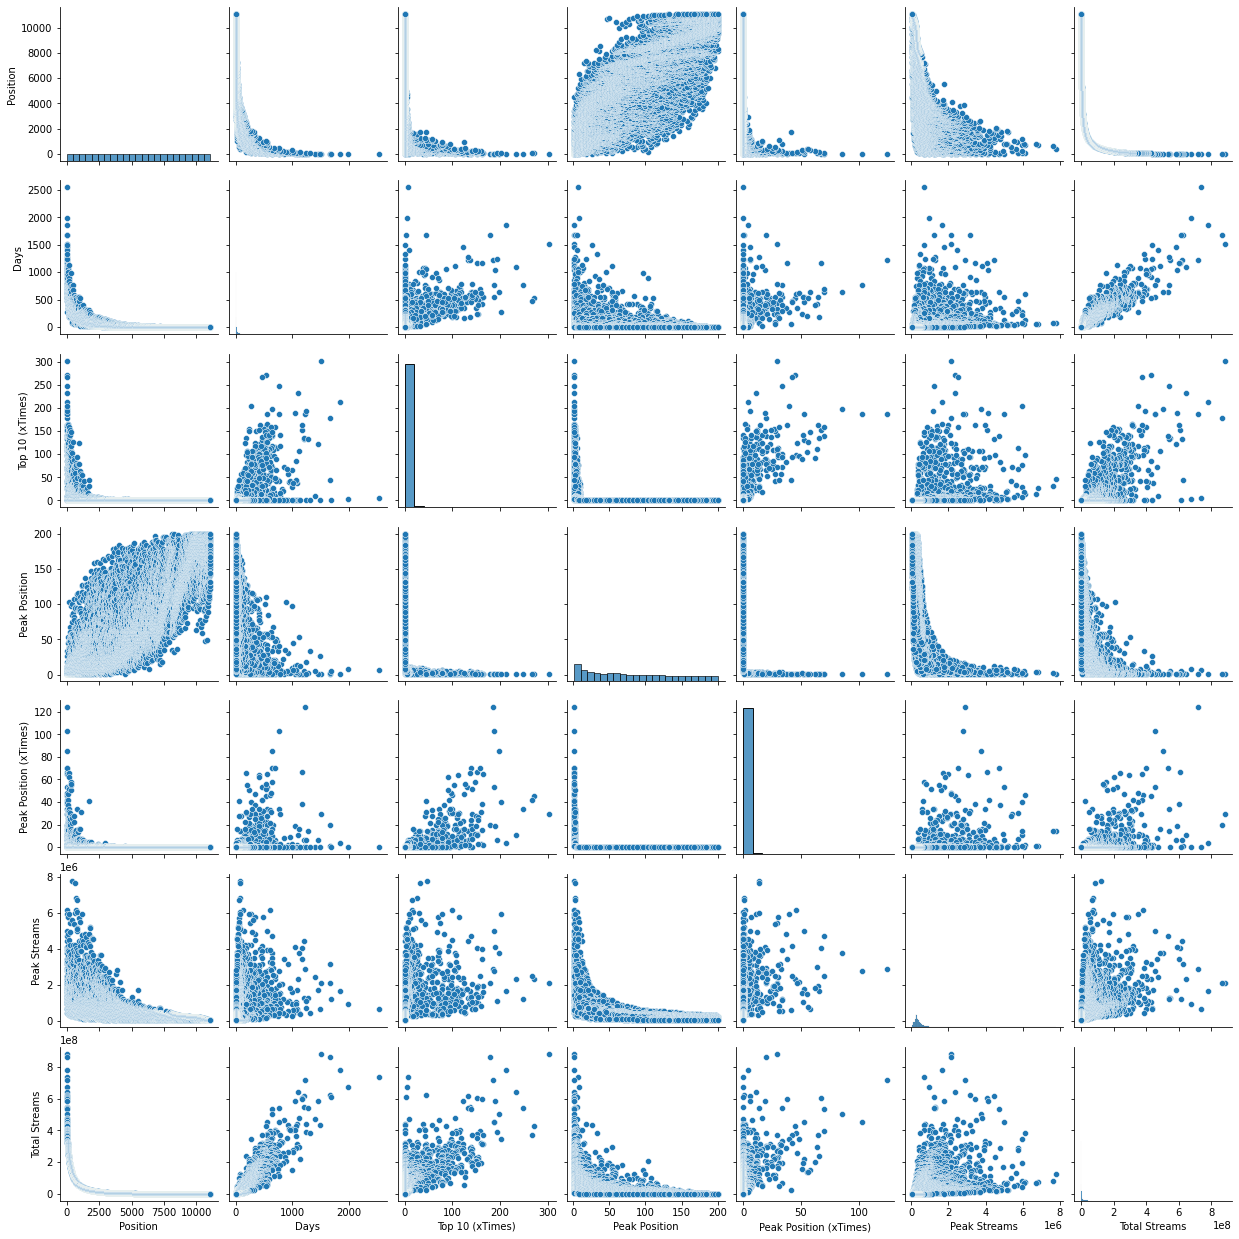

In [24]:
sns.pairplot(spotify, kind="scatter")
# Pairplots

In [25]:
#WIll need to seperate Data so that visuals will make more sense

<Axes: xlabel='Total Streams', ylabel='Count'>

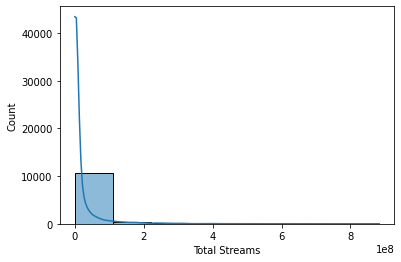

In [26]:
sns.histplot(data=spotify, x="Total Streams", bins=8, kde=True)
#set kde to false to remove density plot 

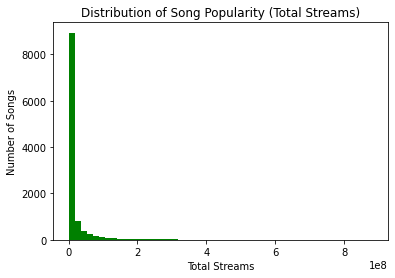

In [27]:
# Plot histogram of Total Streams
plt.hist(spotify['Total Streams'], bins=50, color='green')

# Add labels and title
plt.xlabel("Total Streams")
plt.ylabel("Number of Songs")
plt.title("Distribution of Song Popularity (Total Streams)")

# Show plot
plt.show()

Majority of songs have total streams less than 100,000. Data will need to be split

In [28]:
spotify

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,4,1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,124,2905678,718865961
...,...,...,...,...,...,...,...,...,...
11079,11080,The Band Perry,If I Die Young,1,0.0,184,0,51321,51321
11080,11081,Justin Timberlake,Not a Bad Thing,1,0.0,196,0,49512,49512
11081,11082,Mike WiLL Made,It 23,1,0.0,167,0,46547,46547
11082,11083,The Vamps,Somebody To You,1,0.0,200,0,44962,44962


In [29]:
SpotifyHigh = spotify[spotify['Total Streams'] > 100000000]
SpotifyHigh

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,4,1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,124,2905678,718865961
...,...,...,...,...,...,...,...,...,...
526,527,Nicky Youre,Sunroof,238,0.0,19,0,642413,100753638
527,528,Drake,Pop Style,280,22.0,3,10,1144421,100358319
528,529,Drake,Back To Back,410,5.0,10,0,437503,100323465
529,530,Selena Gomez,Wolves,212,9.0,3,1,1274551,100276358


<Axes: >

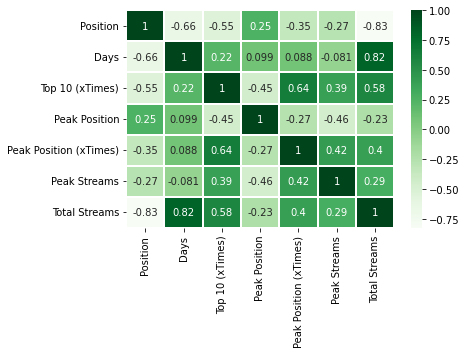

In [30]:
sns.heatmap(SpotifyHigh.corr(),linewidths=2,cmap="Greens", annot=True)

<Axes: xlabel='Days', ylabel='Total Streams'>

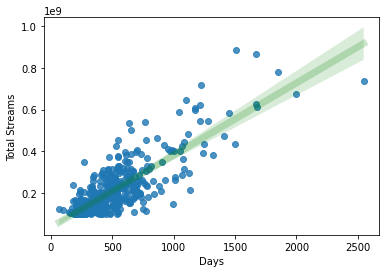

In [31]:
sns.regplot(x='Days', y='Total Streams', data=SpotifyHigh, line_kws={"color":"green","alpha":0.2,"lw":7}) 

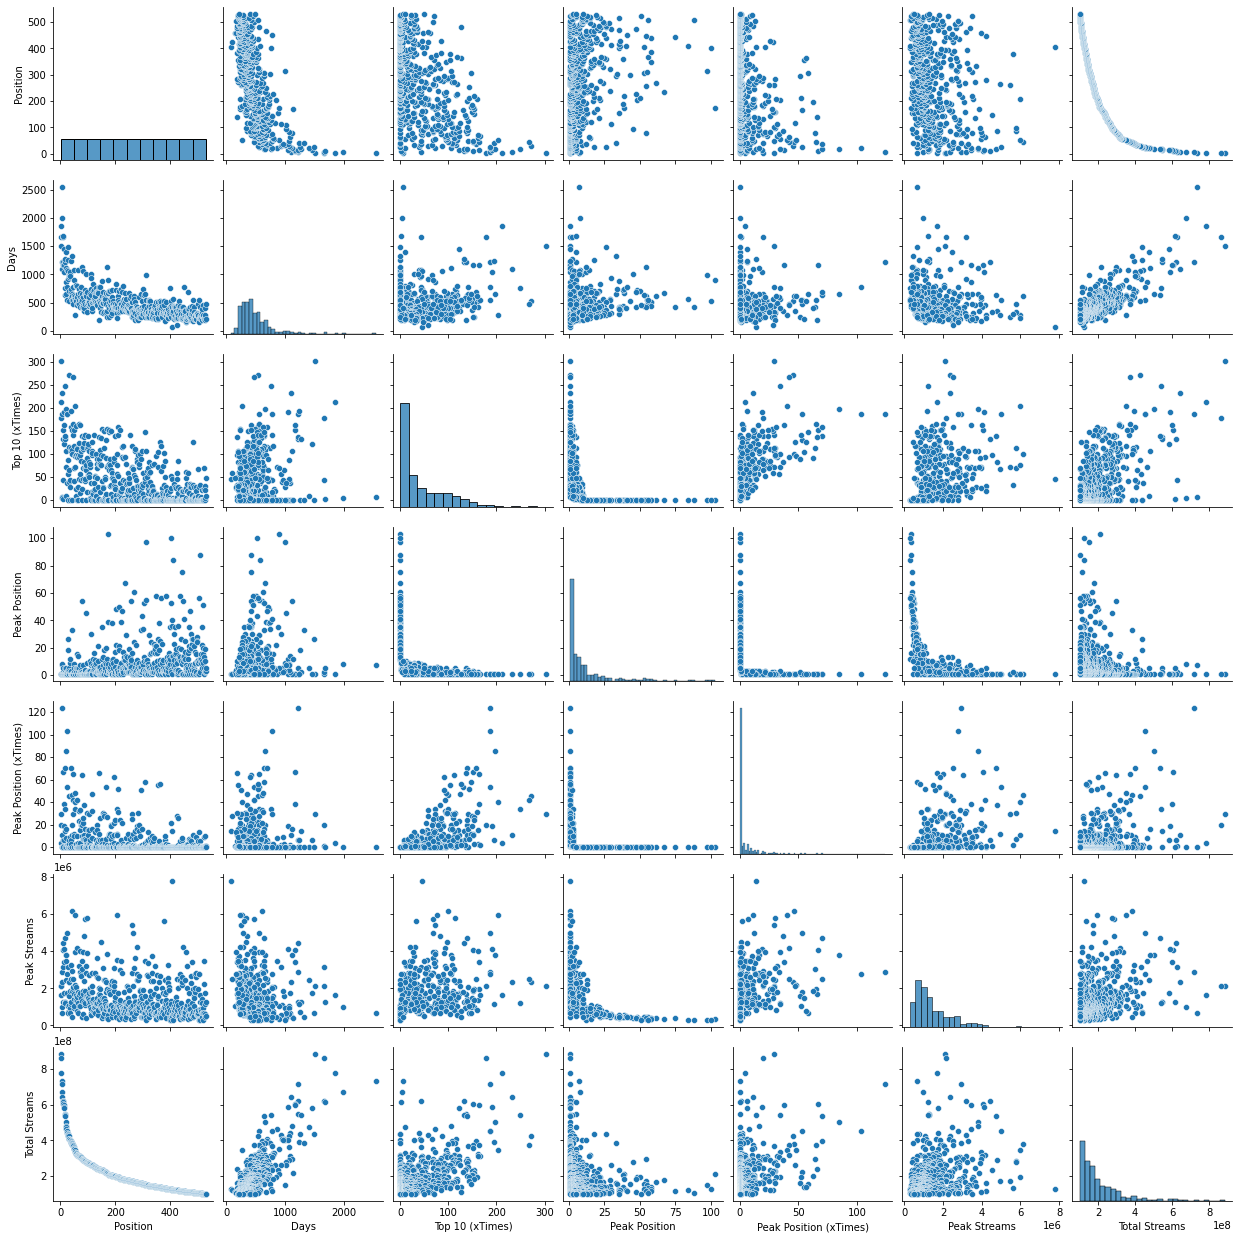

In [32]:
sns.pairplot(SpotifyHigh, kind="scatter")

## Joining two Datasets

In [33]:
#Importing second dataset

In [34]:
from google.colab import files
uploaded = files.upload()

Saving spotify_top_charts_22.csv to spotify_top_charts_22.csv


In [35]:
import io
ChartData = pd.read_csv(io.BytesIO(uploaded['spotify_top_charts_22.csv']))
# Dataset is now stored in a Pandas Dataframe
ChartData

,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,spotify:track:3IAfUEeaXRX9s9UdKOJrFI,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,spotify:track:1HhNoOuqm1a5MXYEgAFl8o,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,spotify:track:0So2sgVa8aJiARPl2P29u2,SALES,Pope Is a Rockstar,108,5,0.725,0.446,4,-8.958,0,0.0287,0.8500,0.243000,0.1070,90.024,4,187333
642,spotify:track:1TUuhV75FeOF6UObRsABo2,Morgan Wallen,Don't Think Jesus,96,1,0.578,0.431,2,-7.034,1,0.0269,0.4690,0.000000,0.1370,116.979,3,226975
643,spotify:track:3GbQcjKWT7eVpUfzqwUjxv,"Lil Nas X, YoungBoy Never Broke Again",Late To Da Party (F*CK BET) (feat. YoungBoy Ne...,86,1,0.872,0.422,1,-7.415,0,0.3630,0.0254,0.000000,0.1090,149.956,4,180666
644,spotify:track:7My9ca9QEIR8MvIOdIrTWA,"Eminem, Snoop Dogg",From The D 2 The LBC (with Snoop Dogg),135,1,0.730,0.785,9,-7.986,0,0.2430,0.1050,0.000000,0.0445,82.037,4,215120


In [36]:
#Removing uri column

In [37]:
Charts = ChartData.drop(columns =['uri'] , axis =1)
Charts

,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,SALES,Pope Is a Rockstar,108,5,0.725,0.446,4,-8.958,0,0.0287,0.8500,0.243000,0.1070,90.024,4,187333
642,Morgan Wallen,Don't Think Jesus,96,1,0.578,0.431,2,-7.034,1,0.0269,0.4690,0.000000,0.1370,116.979,3,226975
643,"Lil Nas X, YoungBoy Never Broke Again",Late To Da Party (F*CK BET) (feat. YoungBoy Ne...,86,1,0.872,0.422,1,-7.415,0,0.3630,0.0254,0.000000,0.1090,149.956,4,180666
644,"Eminem, Snoop Dogg",From The D 2 The LBC (with Snoop Dogg),135,1,0.730,0.785,9,-7.986,0,0.2430,0.1050,0.000000,0.0445,82.037,4,215120


In [38]:
Charts.columns

Index(['artist_names', 'track_name', 'peak_rank', 'weeks_on_chart',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

In [39]:
spotify.columns

Index(['Position', 'Artist Name', 'Song Name', 'Days', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams'],
      dtype='object')

In [40]:
#Rename track_names to Song Name so can use Join
Charts.rename(columns={'track_name': 'Song Name'}, inplace=True)
Charts

,artist_names,Song Name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,SALES,Pope Is a Rockstar,108,5,0.725,0.446,4,-8.958,0,0.0287,0.8500,0.243000,0.1070,90.024,4,187333
642,Morgan Wallen,Don't Think Jesus,96,1,0.578,0.431,2,-7.034,1,0.0269,0.4690,0.000000,0.1370,116.979,3,226975
643,"Lil Nas X, YoungBoy Never Broke Again",Late To Da Party (F*CK BET) (feat. YoungBoy Ne...,86,1,0.872,0.422,1,-7.415,0,0.3630,0.0254,0.000000,0.1090,149.956,4,180666
644,"Eminem, Snoop Dogg",From The D 2 The LBC (with Snoop Dogg),135,1,0.730,0.785,9,-7.986,0,0.2430,0.1050,0.000000,0.0445,82.037,4,215120


In [41]:
# Joining Dataset
resultdf=pd.merge(spotify, Charts, on = 'Song Name', how = 'inner' )
resultdf

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,artist_names,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,2,Juice WRLD,Lucid Dreams,1673,178.0,1,20,2127668,864832399,Juice WRLD,...,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,83.903,4,239836
1,10354,Joseph Yap,Lucid Dreams,1,0.0,187,0,202894,202894,Juice WRLD,...,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,83.903,4,239836
2,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487,J. Cole,...,10,-8.492,0,0.3390,0.32400,0.000000,0.0534,100.028,4,292799
3,6,Travis Scott,goosebumps,1995,4.0,8,0,977275,672972704,Travis Scott,...,7,-3.370,1,0.0484,0.08470,0.000000,0.1490,130.049,4,243837
4,7,The Weeknd,Blinding Lights,1100,233.0,1,11,2355059,644287953,The Weeknd,...,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,171.005,4,200040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,9189,Daddy Yankee,RUMBATÓN,1,0.0,151,0,277811,277811,Daddy Yankee,...,3,-4.034,0,0.0396,0.04710,0.000000,0.3500,95.004,4,248769
514,9692,Maluma,Sobrio,1,0.0,143,0,249769,249769,Maluma,...,5,-2.758,1,0.2230,0.13800,0.000000,0.1500,177.998,4,201181
515,9786,ROSALÍA,SAOKO,1,0.0,166,0,244578,244578,ROSALÍA,...,0,-5.702,1,0.2650,0.79000,0.000024,0.4970,99.988,4,137533
516,10536,Sean Paul,No Lie,1,0.0,160,0,165443,165443,"Sean Paul, Dua Lipa",...,7,-2.862,1,0.1170,0.04660,0.000000,0.2060,102.040,4,221176


In [42]:
resultdf.columns

Index(['Position', 'Artist Name', 'Song Name', 'Days', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams', 'artist_names', 'peak_rank', 'weeks_on_chart',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

In [43]:
#Removing Unneccessary columns
resultdf.drop(columns = ['Peak Streams', 'Days', 'peak_rank'],  axis =1, inplace = True)
resultdf

,Position,Artist Name,Song Name,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Total Streams,artist_names,weeks_on_chart,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,2,Juice WRLD,Lucid Dreams,178.0,1,20,864832399,Juice WRLD,194,0.511,...,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,83.903,4,239836
1,10354,Joseph Yap,Lucid Dreams,0.0,187,0,202894,Juice WRLD,194,0.511,...,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,83.903,4,239836
2,4,J. Cole,No Role Modelz,6.0,7,0,734857487,J. Cole,35,0.690,...,10,-8.492,0,0.3390,0.32400,0.000000,0.0534,100.028,4,292799
3,6,Travis Scott,goosebumps,4.0,8,0,672972704,Travis Scott,226,0.841,...,7,-3.370,1,0.0484,0.08470,0.000000,0.1490,130.049,4,243837
4,7,The Weeknd,Blinding Lights,233.0,1,11,644287953,The Weeknd,121,0.514,...,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,171.005,4,200040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,9189,Daddy Yankee,RUMBATÓN,0.0,151,0,277811,Daddy Yankee,1,0.685,...,3,-4.034,0,0.0396,0.04710,0.000000,0.3500,95.004,4,248769
514,9692,Maluma,Sobrio,0.0,143,0,249769,Maluma,28,0.762,...,5,-2.758,1,0.2230,0.13800,0.000000,0.1500,177.998,4,201181
515,9786,ROSALÍA,SAOKO,0.0,166,0,244578,ROSALÍA,2,0.827,...,0,-5.702,1,0.2650,0.79000,0.000024,0.4970,99.988,4,137533
516,10536,Sean Paul,No Lie,0.0,160,0,165443,"Sean Paul, Dua Lipa",34,0.742,...,7,-2.862,1,0.1170,0.04660,0.000000,0.2060,102.040,4,221176


In [44]:
# Only looking at top 1000 of data
resultdf.drop(resultdf.loc[resultdf['Position'] > 1000].index, inplace = True)
resultdf

,Position,Artist Name,Song Name,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Total Streams,artist_names,weeks_on_chart,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,2,Juice WRLD,Lucid Dreams,178.0,1,20,864832399,Juice WRLD,194,0.511,...,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,83.903,4,239836
2,4,J. Cole,No Role Modelz,6.0,7,0,734857487,J. Cole,35,0.690,...,10,-8.492,0,0.3390,0.32400,0.000000,0.0534,100.028,4,292799
3,6,Travis Scott,goosebumps,4.0,8,0,672972704,Travis Scott,226,0.841,...,7,-3.370,1,0.0484,0.08470,0.000000,0.1490,130.049,4,243837
4,7,The Weeknd,Blinding Lights,233.0,1,11,644287953,The Weeknd,121,0.514,...,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,171.005,4,200040
6,8,XXXTENTACION,Jocelyn Flores,44.0,2,1,624457164,XXXTENTACION,216,0.872,...,0,-9.144,0,0.2420,0.46900,0.000004,0.2970,134.021,4,119133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,960,Tate McRae,she's all i wanna be,1.0,10,0,54992060,Tate McRae,7,0.614,...,2,-5.372,0,0.0426,0.01340,0.000007,0.1170,160.036,4,206772
208,965,Taylor Swift,august,7.0,6,0,54625767,Taylor Swift,7,0.532,...,5,-9.208,1,0.0331,0.53800,0.000073,0.0925,89.937,4,261923
209,973,Vundabar,Alien Blues,0.0,27,0,54041374,Vundabar,4,0.467,...,3,-5.093,1,0.0330,0.08070,0.908000,0.0876,82.282,4,155933
210,975,Coldplay,My Universe,1.0,8,0,53947652,"Coldplay, BTS",26,0.573,...,1,-6.268,0,0.0406,0.01140,0.000000,0.3280,105.006,4,226198


## Visualising Merged Dataset

[Text(0, 0.5, 'Position'),
 Text(0, 1.5, 'Top 10 (xTimes)'),
 Text(0, 2.5, 'Peak Position'),
 Text(0, 3.5, 'Peak Position (xTimes)'),
 Text(0, 4.5, 'Total Streams'),
 Text(0, 5.5, 'weeks_on_chart'),
 Text(0, 6.5, 'danceability'),
 Text(0, 7.5, 'energy'),
 Text(0, 8.5, 'key'),
 Text(0, 9.5, 'loudness'),
 Text(0, 10.5, 'mode'),
 Text(0, 11.5, 'speechiness'),
 Text(0, 12.5, 'acousticness'),
 Text(0, 13.5, 'instrumentalness'),
 Text(0, 14.5, 'liveness'),
 Text(0, 15.5, 'tempo'),
 Text(0, 16.5, 'time_signature'),
 Text(0, 17.5, 'duration_ms')]

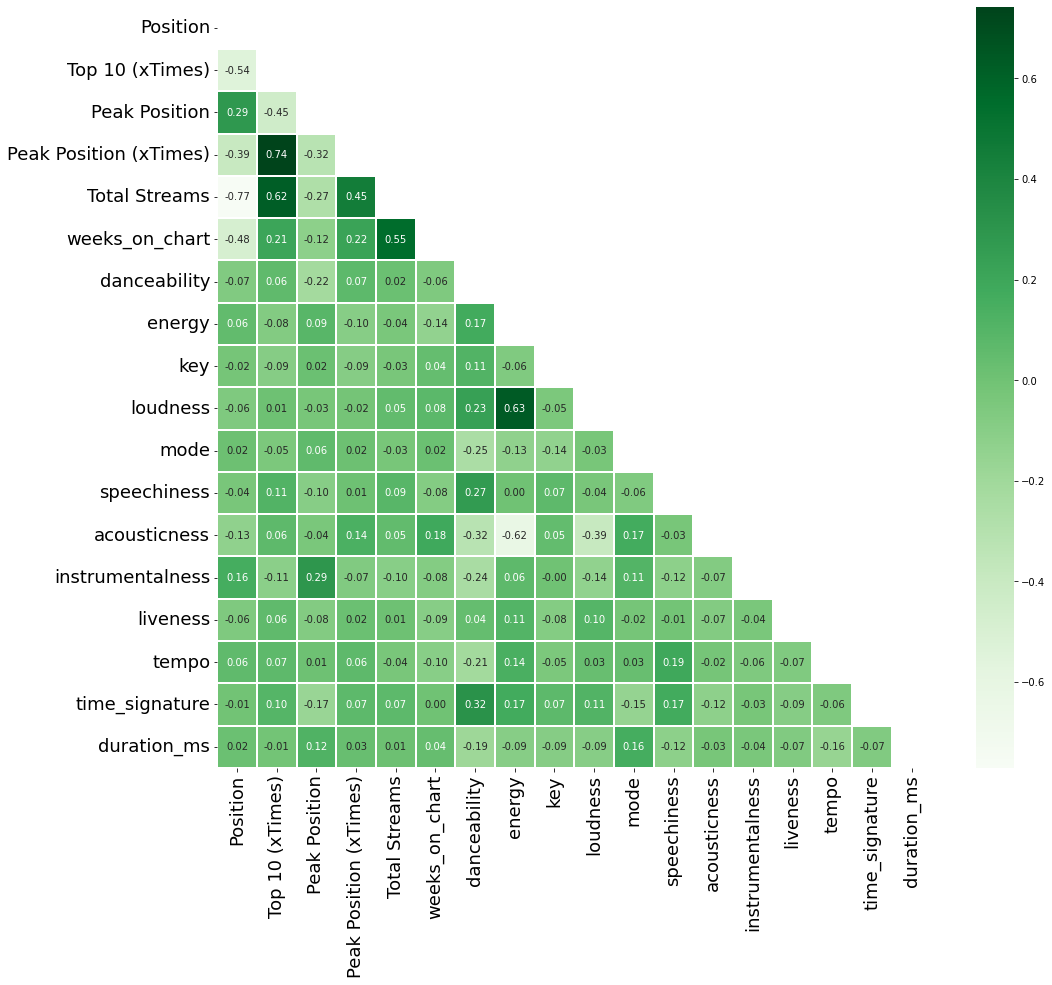

In [45]:
corr =  resultdf.corr()
# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.subplots(figsize=(16,14))
res = sns.heatmap(resultdf.corr(),mask = mask, fmt='.2f', linewidths=2,cmap="Greens", annot=True)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)

<Axes: xlabel='Position', ylabel='Total Streams'>

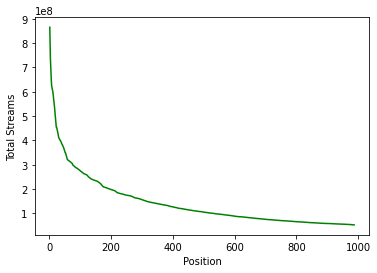

In [46]:
sns.lineplot(x='Position', y='Total Streams', data=resultdf, errorbar=None, color ='Green')

[Text(0, 0.5, 'Position'),
 Text(0, 1.5, 'Top 10 (xTimes)'),
 Text(0, 2.5, 'Peak Position'),
 Text(0, 3.5, 'Peak Position (xTimes)'),
 Text(0, 4.5, 'Total Streams'),
 Text(0, 5.5, 'weeks_on_chart'),
 Text(0, 6.5, 'danceability'),
 Text(0, 7.5, 'energy'),
 Text(0, 8.5, 'key'),
 Text(0, 9.5, 'loudness'),
 Text(0, 10.5, 'mode'),
 Text(0, 11.5, 'speechiness'),
 Text(0, 12.5, 'acousticness'),
 Text(0, 13.5, 'instrumentalness'),
 Text(0, 14.5, 'liveness'),
 Text(0, 15.5, 'tempo'),
 Text(0, 16.5, 'time_signature'),
 Text(0, 17.5, 'duration_ms')]

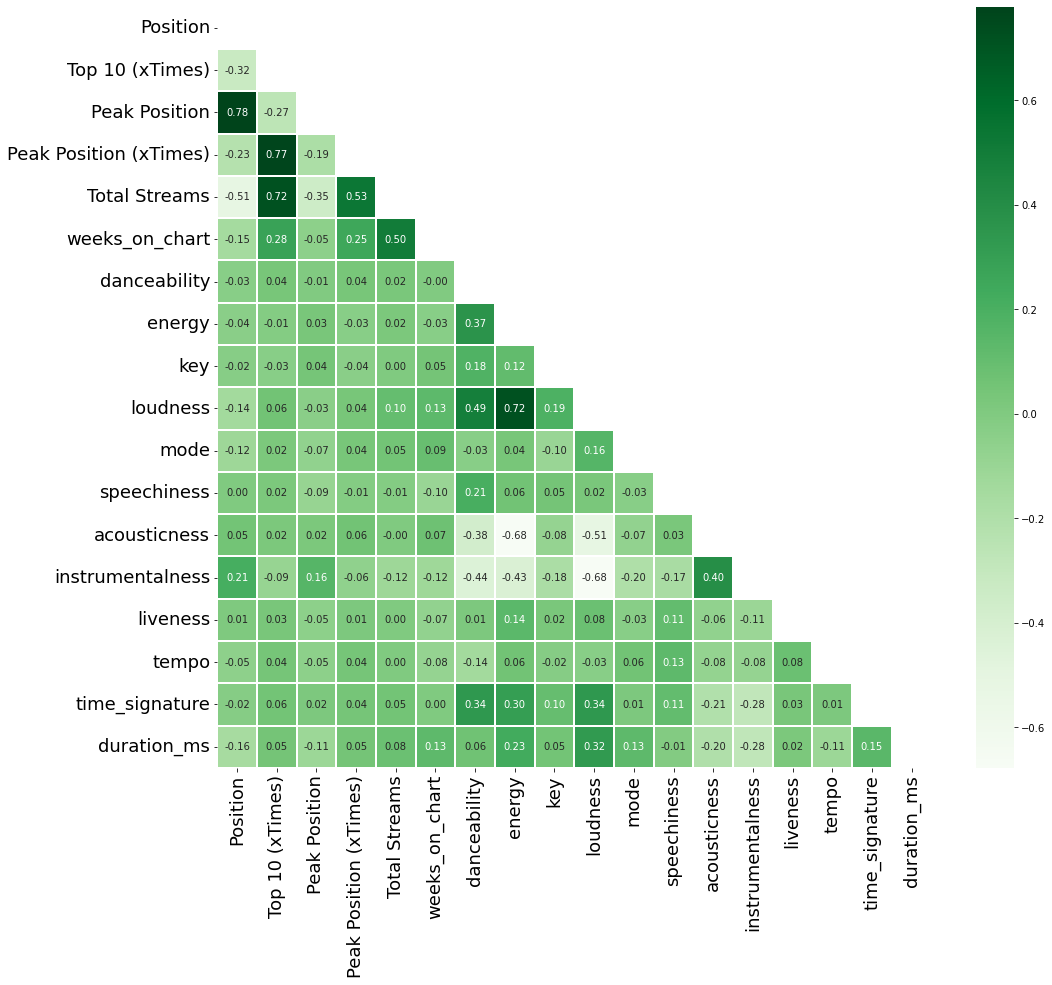

In [47]:
#Not looking at top 1000
newdf=pd.merge(spotify, Charts, on = 'Song Name', how = 'inner' )
newdf.drop(columns = ['Peak Streams', 'Days', 'peak_rank'],  axis =1, inplace = True)

# Visualising HeatMap
corr =  newdf.corr()
# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.subplots(figsize=(16,14))
res = sns.heatmap(newdf.corr(),mask = mask, fmt='.2f', linewidths=2,cmap="Greens", annot=True)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)

In [48]:
newdf.columns

Index(['Position', 'Artist Name', 'Song Name', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Total Streams',
       'artist_names', 'weeks_on_chart', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'tempo', 'time_signature', 'duration_ms'],
      dtype='object')

<ipython-input-49-83cda76cd38e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf["duration_ms"], color = 'green')


<Axes: xlabel='duration_ms', ylabel='Density'>

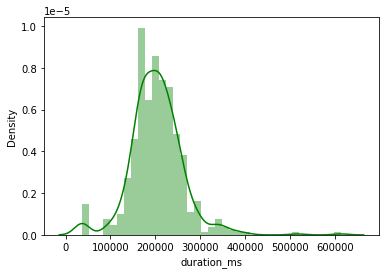

In [49]:
sns.distplot(newdf["duration_ms"], color = 'green')

<Axes: xlabel='duration_ms', ylabel='Total Streams'>

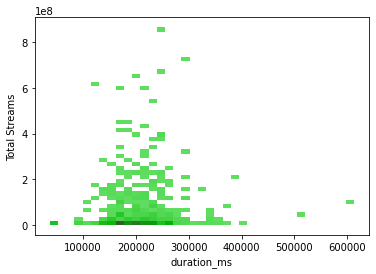

In [50]:
sns.histplot(data = newdf, x="duration_ms", y ="Total Streams", kde = True, color = 'green')

Higher streaming numbers are found in songs where the Duration is between 2
to 4 minutes

<Axes: xlabel='duration_ms', ylabel='Total Streams'>

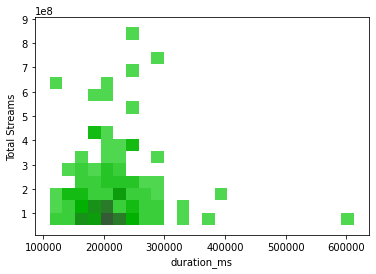

In [51]:
sns.histplot(data = resultdf, x="duration_ms", y ="Total Streams", kde = True, color = 'green')

<Axes: xlabel='energy', ylabel='Total Streams'>

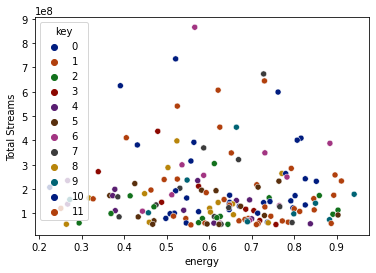

In [52]:
sns.scatterplot(data=resultdf,x= "energy",y="Total Streams",hue="key", palette = 'dark')

<ipython-input-53-eef8bbfc346d>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)


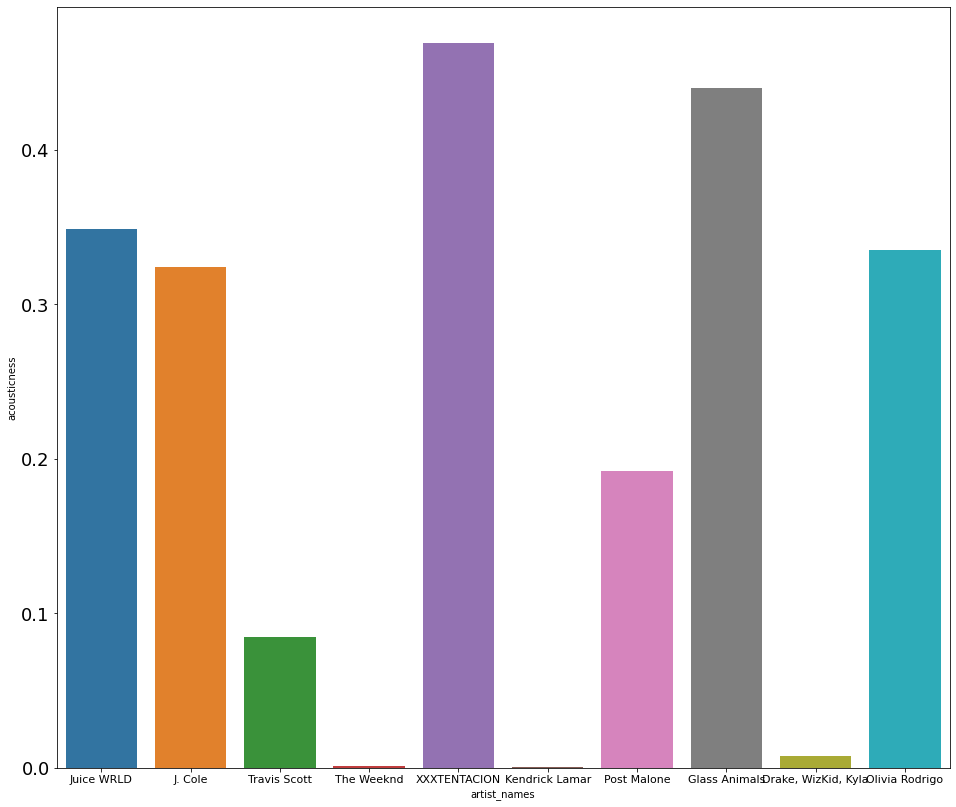

In [53]:
Higher=resultdf[["acousticness", "artist_names", "Total Streams"]].sort_values(by='Total Streams',ascending=False)[:10]
plt.figure(figsize=(16,14))
res = sns.barplot(y="acousticness",x="artist_names",data=Higher)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 11)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)

plt.show()

Text(0.5, 1.0, 'mean acousticness for song popularity')

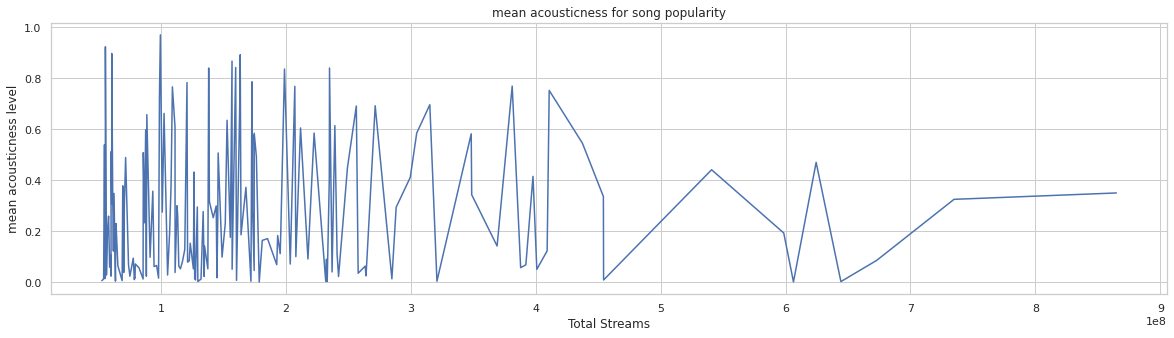

In [90]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = resultdf.groupby("Total Streams")["acousticness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean acousticness level')
axis.set_xlabel('Total Streams')
axis.set_title("mean acousticness for song popularity")

Can focus on total streams above 60000000 as that is where majority of 

In [55]:
resultdf.columns

Index(['Position', 'Artist Name', 'Song Name', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Total Streams',
       'artist_names', 'weeks_on_chart', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'tempo', 'time_signature', 'duration_ms'],
      dtype='object')

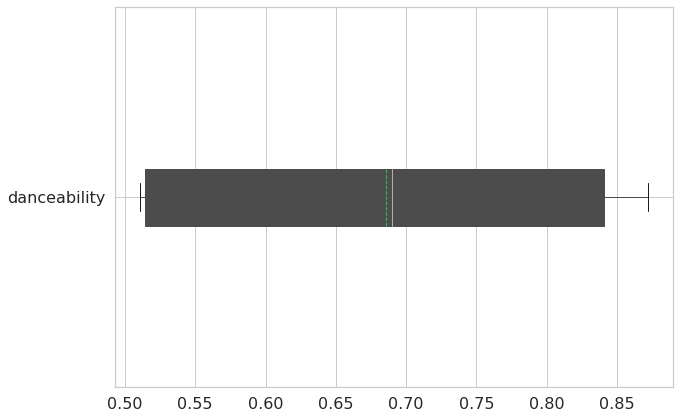

In [102]:
#Box plot of Dancebility

#Specifying Merged Dataframe where position is <10 (Top 10)
Shortmerge = resultdf.drop(resultdf.loc[resultdf['Position'] > 10].index)
Shortmerge

#Creating Box plot
fig = plt.figure(figsize =(10, 7))
Box = Shortmerge.boxplot(column=['danceability'], vert=0, fontsize = 16, patch_artist=True, meanline=True, showmeans=True) 
#Visible dotted line is mean not median
#Ask, how can i edit the colour of the box plot. have used color='green', but it doesnt differentiate the median line

<Axes: xlabel='danceability', ylabel='Count'>

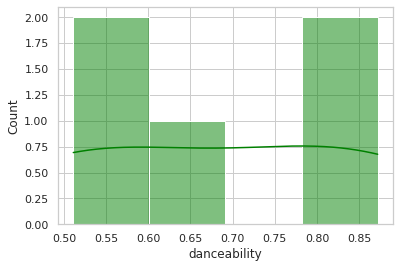

In [122]:
sns.histplot(data=Shortmerge, x="danceability", kde=True, color="green")

<Axes: xlabel='energy', ylabel='Count'>

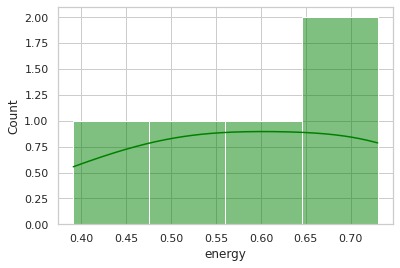

In [123]:
sns.histplot(data=Shortmerge, x="energy", kde=True, color="green")

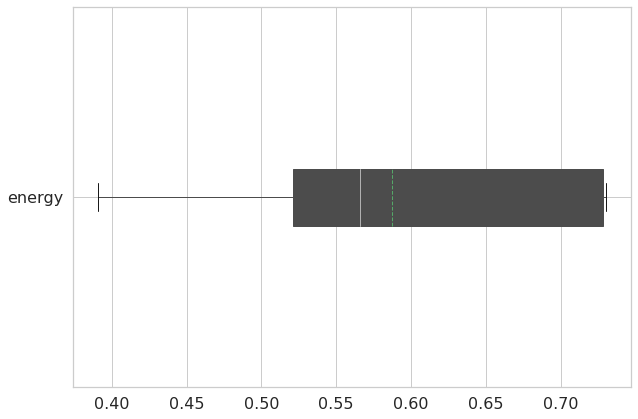

In [103]:
#Box plot of energy

#Creating Box plot
fig = plt.figure(figsize =(10, 7))
Box = Shortmerge.boxplot(column=['energy'], vert=0, fontsize = 16, patch_artist=True, meanline=True, showmeans=True) 
#Visible dotted line is mean not median

In [116]:
Shortmerge.columns

Index(['Position', 'Artist Name', 'Song Name', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Total Streams',
       'artist_names', 'weeks_on_chart', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'tempo', 'time_signature', 'duration_ms'],
      dtype='object')

<Axes: xlabel='instrumentalness', ylabel='Count'>

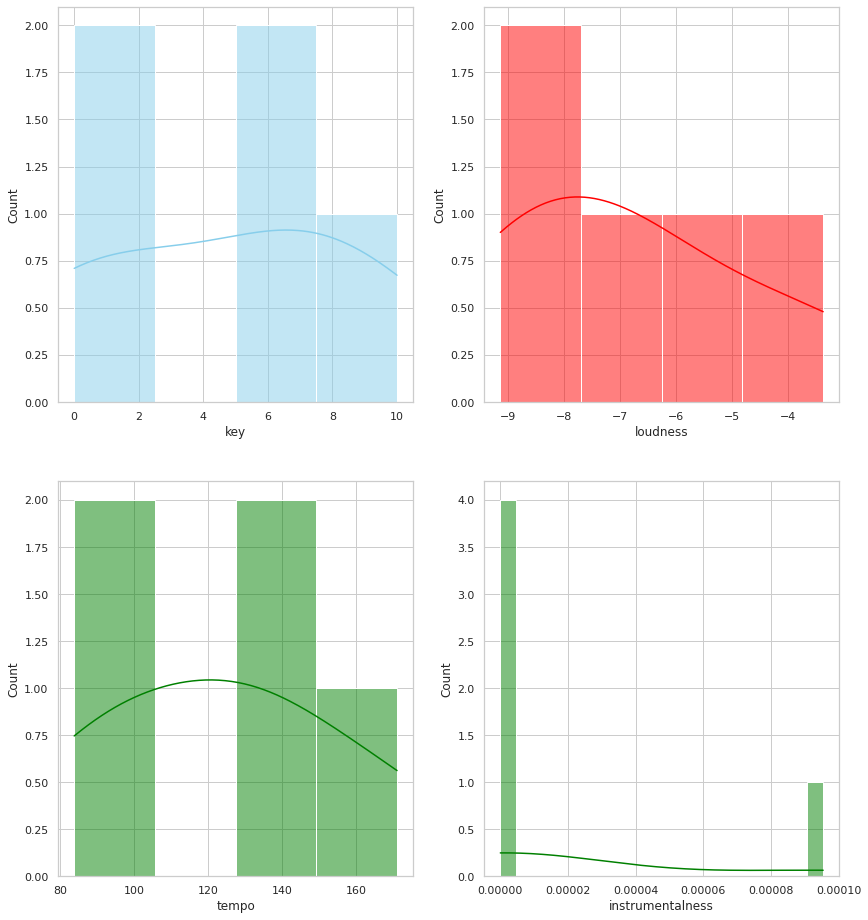

In [120]:
fig, axs = plt.subplots(2, 2, figsize=(14, 16))

sns.histplot(data=Shortmerge, x="key", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=Shortmerge, x="loudness", kde=True, color="red", ax=axs[0, 1])
sns.histplot(data=Shortmerge, x="tempo", kde=True, color="green", ax=axs[1, 0])
sns.histplot(data=Shortmerge, x="instrumentalness", kde=True, color="green", ax=axs[1, 1])

In [ ]:
fig2, axes_2 = plt.subplots(figsize = (12,8), nrows = 2, ncols=2) #figsize represents the (width, height)
plt.tight_layout() # what does this do?

#First plot
axes_2[0,0].set_title('Plot 1')
axes_2[0,0].plot(x,y, 'red', marker='o')

#Second plot
axes_2[0,1].set_title('Plot 2')
axes_2[0,1].plot(x,x**2, 'blue', linestyle='--')

#Third plot
axes_2[1,0].set_title('Plot 3')
axes_2[1,0].plot(y,y**2, 'green')

axes_2[1,1].set_title('Plot 4')
axes_2[1,1].plot(y,x, 'yellow')